## The Difference in Vehicle Theft Proportions in the Hastings-Sunrise Neighbourhood Between 2021 and 2022
#### Authors: Haobo Li, Junbo Rao, Ahana Thakur, Irene Wan

### Introduction

There has been an unprecedented increase in inflation in 2022. Factors contributing to this are largely connected to COVID-19, including the reopening of economies around the world and increased need for services that were suspended during the height of the pandemic. Strained global supply chains were further impaired by the Russian-Ukrainian conflict, leading to an increase in comodity prices – particularly in gas and food items (Macklem, 2022). 

In response to increasing demand and waning supply, crime rates also seem to be on the rise in Vancouver. Studies have suggested a positive trend between crime and inflation rates, primarily due to unsustainable costs of living (Tang & Lean, 2007; Rosenfeld, 2014). Therefore, this report will investigate whether crime rates have indeed increased in 2022. 

It has been established that car theft in the US has been surging due to a nearly 30% increase in used car prices from inflation (Cohn, 2021). To determine whether a similar phenomenon can be observed in Vancouver, we will be analyzing crimes occuring in the Hastings-Sunrise neighbourhood and calculating the proportion of crimes that were vehicle thefts 2021 and 2022. A comparison of the two statistics will demonstrate whether there has been a significant difference between the two timepoints of interest. 

Our datasets, `crime_data_2021` and `crime_data_2022`, have been sourced from the Vancouver Police Department (VPD Open Data) and include the following variables:
* `TYPE`: The type of crime committed
* `YEAR`, `MONTH`, `DAY`, `HOUR`, `MINUTE`: When the crime occurred
* `HUNDRED_BLOCK`: The city block (in hundreds) and street where the crime occurred
* `NEIGHBOURHOOD`: The neighbourhood where the crime occurred, only crimes from the Hastings-Sunrise neighbourhood are included in the datasets
* `X`, `Y`: Additional locational information for the crime

A conclusion will be made through hypothesis testing. We will find the proportion of theft of vehicles from 2021 ($\hat{p}_2$) and proportion of theft of vehicles from 2022 ($\hat{p}_1$) and compare them. Our null hypothesis will be $H_0: \hat{p}_1 – \hat{p}_2 = 0$, while our alternative hypothesis will be $H_A: \hat{p}_1 – \hat{p}_2 > 0$ 

### Methods

#### Preliminary Results

In [1]:
#Load libraries
set.seed(1)
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(readxl)
library(tidymodels)

#Limiting number of visible table rows
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ dials        1.0.0     ✔ tune         1.0.0
✔ modeldata    1.0.1     ✔ workflows    1.0.0
✔ parsnip      1.0.1     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0
✔ rsample      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ scales::discard()    masks purrr::discard()
✖ dplyr::filter()      masks stats::filte

In [2]:
#Load dataset from web
crime_data_2021 <- read.csv("https://github.com/Haobo11/stat201-group-project/raw/main/crimedata_csv_Hastings-Sunrise_2021.csv")
crime_data_2022 <- read.csv("https://github.com/Haobo11/stat201-group-project/raw/main/crimedata_csv_Hastings-Sunrise_2022.csv")

#Preview datasets
head(crime_data_2021)
print("Table 1. Crime statistics in Hastings-Sunrise in 2021")
head(crime_data_2022)
print("Table 2. Crime statistics in Hastings-Sunrise in 2022")

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2021,8,17,21,57,1XX RENFREW ST,Hastings-Sunrise,496804.9,5459011
2,Theft from Vehicle,2021,9,20,20,45,20XX CASSIAR ST,Hastings-Sunrise,497740.0,5457015
3,Theft from Vehicle,2021,3,5,3,30,20XX CASSIAR ST,Hastings-Sunrise,497740.0,5457017
4,Theft from Vehicle,2021,2,15,12,0,21XX KAMLOOPS ST,Hastings-Sunrise,496024.4,5456995
5,Theft from Vehicle,2021,6,28,12,0,21XX LILLOOET ST,Hastings-Sunrise,497165.9,5456990
6,Theft from Vehicle,2021,4,14,3,0,21XX NANAIMO ST,Hastings-Sunrise,495887.6,5456922


[1] "Table 1. Crime statistics in Hastings-Sunrise in 2021"


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2022,5,3,22,0,1XX KOOTENAY ST,Hastings-Sunrise,498134.7,5458960
2,Theft from Vehicle,2022,5,26,7,30,1XX N RENFREW ST,Hastings-Sunrise,496800.4,5459316
3,Theft from Vehicle,2022,1,10,18,0,1XX NANAIMO ST,Hastings-Sunrise,495893.3,5459013
4,Theft from Vehicle,2022,9,25,17,55,1XX RENFREW ST,Hastings-Sunrise,496795.9,5458959
5,Theft from Vehicle,2022,4,29,20,0,20XX KAMLOOPS ST,Hastings-Sunrise,496024.4,5457091
6,Theft from Vehicle,2022,8,27,2,0,20XX NANAIMO ST,Hastings-Sunrise,495887.8,5457043


[1] "Table 2. Crime statistics in Hastings-Sunrise in 2022"


Before we begin data analysis, we will first visualize the dataset
* The two datasets will be combined into one `theft_vehicle` dataset for the purposes of the visualization. Later analysis will use the separate data sets
* In order to isolate the crime type of interest `"Theft of Vehicle"`, all other crime types will be relabelled as `"Other"`
* The `YEAR` variable will be changed from an integer to a factor type, since we will be treating it as a categorical/discrete variable

In [3]:
#Tidying data
theft_vehicle <- rbind(crime_data_2021, crime_data_2022) %>%   #combining dataframes
    select(TYPE, YEAR) %>%   #selecting only columns with the type of crime and year it occurred
    mutate(TYPE = if_else(TYPE == "Theft of Bicycle", "Other", TYPE),   
           TYPE = if_else(TYPE == "Theft from Vehicle", "Other", TYPE),
           TYPE = if_else(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "Other", TYPE),
           TYPE = if_else(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)", "Other", TYPE),
           TYPE = if_else(TYPE == "Break and Enter Commercial", "Other", TYPE),
           TYPE = if_else(TYPE == "Break and Enter Residential/Other", "Other", TYPE),
           TYPE = if_else(TYPE == "Homicide", "Other", TYPE),
           TYPE = if_else(TYPE == "Mischief", "Other", TYPE),
           TYPE = if_else(TYPE == "Offence Against a Person", "Other", TYPE),
           TYPE = if_else(TYPE == "Other Theft", "Other", TYPE))   #separating crime of interest, Theft of Vehicle, from other crimes

#Changing YEAR variables from integer to factor
theft_vehicle$YEAR <- as.factor(theft_vehicle$YEAR)

head(theft_vehicle)

,TYPE,YEAR
,<chr>,<fct>
1,Other,2021
2,Other,2021
3,Other,2021
4,Other,2021
5,Other,2021
6,Other,2021


**Table 3.** A dataframe containing isolated variables of interest.

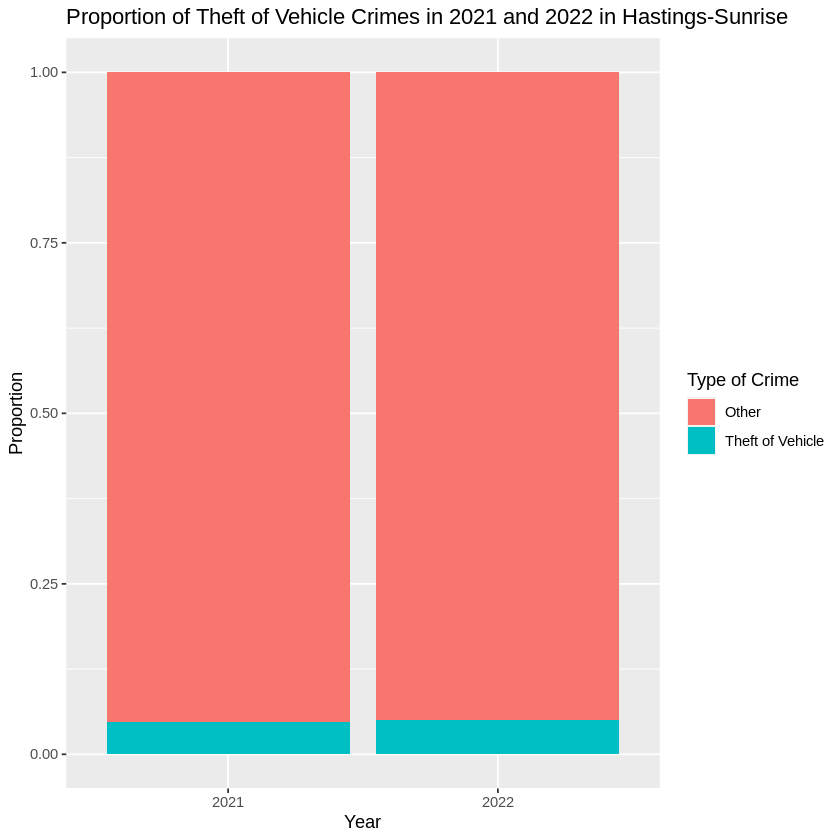

In [4]:
#Visualizing the proportion of crimes that were Theft of Vehicle
theft_vehicle_plot <- theft_vehicle %>%
    ggplot() +
        geom_bar(aes(x = YEAR, fill = TYPE), position = "fill") +
        labs(x = "Year", y = "Proportion", fill = "Type of Crime") +
        ggtitle("Proportion of Theft of Vehicle Crimes in 2021 and 2022 in Hastings-Sunrise")
theft_vehicle_plot

**Figure 1.** A bar graph of the proportion of crimes in 2021 and 2022 that were Theft of Vehicle in the Hastings-Sunrise neighbourhood. 

From this graph, it appears that there was a slight increase in the proportion of Theft of Vehicle in 2022 compared to 2021, however we cannot conclude whether this difference is significant or not. To do so, we will proceed with our hypothesis testing.

### Results

### Discussion

### References

Cohn, S. (2021, June 18). With car prices surging, yours is a prime target for thieves. *CNBC*. [Accessed 2023, April 09]. https://www.cnbc.com/2021/06/18/with-car-prices-surging-yours-is-a-prime-target-for-thieves-.html.

Crime Data in Hastings-Sunrise. *VPD Open Data*. [Accessed 2023, April 09]. https://geodash.vpd.ca/opendata/.  

Crime Statistics. *Vancouver Police Department*. [Accessed 2023, April 09]. https://vpd.ca/crime-statistics/. 

Macklem, T. (2022, October 06). What’s happening to inflation and why it matters. *Bank of Canada*. [Accessed 2023, April 09]. https://www.bankofcanada.ca/2022/10/whats-happening-to-inflation-and-why-it-matters.

Rosenfeld, R. (2014). Crime and Inflation in Cross-National Perspective. *Crime and Justice: Review of Research, 43*, 341-366.

Tang, C. F., & Lean, H. H. (2007). Will Inflation Increase Crime Rate? New Evidence from Bounds and Modified Wald Tests. *Global Crime, 8*(4), 311-323. https://doi.org/10.1080/17440570701739694.